<a href="https://colab.research.google.com/github/otaciliojpereira/data-science/blob/master/Aula01_03b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Estudo QuarentenaDados (Sugestão do Kevin e bem interessante)

Data: De 20 a 27/04/2020

Pelo que vi até agora, a organização está da seguinte forma:

   Aula 1 - Recuperar os dados e realizar algumas análises estatísticas

   Aula 2 - Observar os dados via gráfico e alguns tratamentos sobre os dados

   Aula 3 - Mais sobre gráficos e com exploração de eventuais correlações

   Aula 4 - (A avaliar)

   Aula 5 - (A avaliar)

# **Estudo 01 - Fontes e operações sobre as bases de dados**

(Ideia) Quais os grandes repositórios? Existem bases de dados interessantes sobre educação e séries temporais em máquinas (Tenessee Eastman Process)

(Ideia) Criar um GitHb para compartilhar as bases entre suas experiências parece interessante.

Pontos chaves:

- Carga / Compreender formato / Entender sua estrutura / Quais frameworks e suas estruturas típicas / Operações (subconjunto) típicas


In [0]:
# Carregar os dados
a = 10
print(a)

10


# Carga dos dados através do Pandas

Importação / read_csv / operações com o Dataframe (colunas e linhas) / contabilização / outras úteis

Principais bases: movies(filmes) e ratings(avaliacoes)

Fonte interessante: 
Pandas Tutorial: DataFrames in Python / DataCamp

In [0]:
import pandas as pd

In [0]:
filmes = pd.read_csv("https://raw.githubusercontent.com/otaciliojpereira/data-science/master/movies.csv")
# movies.head
# ?movies

avaliacoes = pd.read_csv("https://raw.githubusercontent.com/otaciliojpereira/data-science/master/ratings.csv")

In [9]:
# filmes.columns = ['Id', 'Título', 'Gênero']
# filmes.head
# filmes.head()
# avaliacoes.head()

# Outras funcoes úteis para primeira exploração da base
# filmes.shape   # Por que não é função?
# len(filmes)


9742

# Operações de consulta na tabela de dados / semelhante ao SQL

- Query / 

In [19]:
# avaliacoes.head()
# avaliacoes.describe()
# avaliacoes.query("userId==1")
# avaliacoes["rating"]   # recuperar uma coluna. Isso é uma série.
# avaliacoes.query("movieId==1").describe()  # Percentis e outras informações
# avaliacoes.groupby(['movieId']).mean()


,userId,movieId,rating,timestamp
count,215.000000,215.0,215.000000,2.150000e+02
mean,306.530233,1.0,3.920930,1.129835e+09
std,180.419754,0.0,0.834859,2.393163e+08
min,1.000000,1.0,0.500000,8.293223e+08
25%,155.500000,1.0,3.500000,8.779224e+08
50%,290.000000,1.0,4.000000,1.106855e+09
75%,468.500000,1.0,4.500000,1.348523e+09
max,610.000000,1.0,5.000000,1.535710e+09


In [35]:
# formas de junção
# filmes["media"] = notas_media["notamedia"]   # isso só vale de mesmo número de itens e na mesma ordem

# filmes.head()
# avaliacoes.head()
# avaliacoes_filme = avaliacoes.groupby("movieId").mean()["rating"]
# avaliacoes_filme.head()
# avaliacoes_filme.shape


# media_notas = filmes.join(avaliacoes_filme, on="movieId")
# media_notas.head()


,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [41]:
# Ordenação
media_notas.sort_values("rating", ascending=False)

,movieId,title,genres,rating
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
...,...,...,...,...
5749,30892,In the Realms of the Unreal (2004),Animation|Documentary,NaN
5824,32160,Twentieth Century (1934),Comedy,NaN
5837,32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,NaN
5957,34482,"Browning Version, The (1951)",Drama,NaN


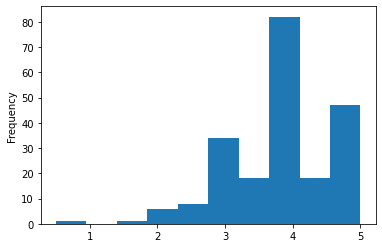

In [51]:
# Iniciando com gráficos

# avaliacoes.query("movieId == 1")["rating"].plot()
# avaliacoes.query("movieId == 1")["rating"].hist()
# avaliacoes.query("movieId == 1")["rating"].plot(kind="hist")
# Bom para discutir notas em hotel, em avaliações e reomdendações
#   Hotel: O que é melhor (que muitos dão nota 4, ou que há um monte com notas 1 e um monte com notas 2)






In [0]:
# Medidas de centro e dispersão

# Pesquisar depois sobre média, mediana e outros
# Pesquisar sobre desvio padrão, variância e outros
# E quais os tipos de distribuição e em quais delas é interessante usar uma medida ou outra

In [72]:
# Tratamento interessante: strings e get_dummies
# filmes["genres"].str.get_dummies("|").sum()   # Soma por coluna
# filmes["genres"].str.get_dummies("|").sum(axis=1).value_counts() #Soma por linha

# filmes["genres"].str.get_dummies("|").sum().sort_values(ascending=False) # Detalhe sobre series: Index e Values

filmes["genres"].str.get_dummies("|").sum().sort_values(ascending=False).values
filmes["genres"].str.get_dummies("|").sum().sort_values(ascending=False).index
filmes["genres"].str.get_dummies("|").sum().sort_index(ascending=True)




(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

TypeError: ignored

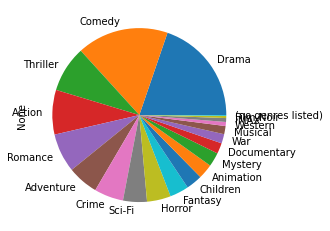

In [97]:
# Mais gráficos
# filmes["genres"].str.get_dummies("|").sum().sort_values(ascending=False).plot()

# Estudo de visualização
# Que tipo de gráfico deve ser plotado conforme variáveis e outros

filmes["genres"].str.get_dummies("|").sum().sort_values(ascending=False).plot(kind="pie")
# filmes["genres"].str.get_dummies("|").sum().sort_values(ascending=False).plot(kind="pie", figsize=(10,10))
#filmes["genres"].str.get_dummies("|").sum().sort_values(ascending=False).plot(kind="bar", figsize=(10,10))
plt.figure(figsize=(8,8))



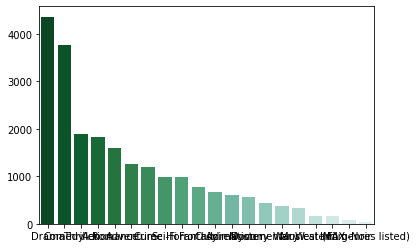

In [104]:
# Usando seaborn

filmes_genero = filmes["genres"].str.get_dummies("|").sum().sort_values(ascending=False)
filmes_genero.head()

# filmes_genero.plot(kind="bar")
# plt.show()

import seaborn as sn

#plt.figure(figsize=(8,8))
sn.barplot(x=filmes_genero.index, 
           y=filmes_genero.values, 
           palette=sn.color_palette("BuGn_r", n_colors=len(filmes_genero)+3))
#plt.show()
# Existem propriedades que são do gráfico, geral, da barra. Avaliar



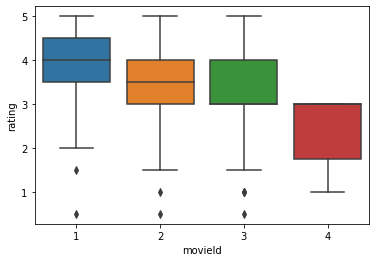

In [109]:
# Boxplot
# filmes_genero.head()
# avaliacoes.head()
sn.boxplot(data=avaliacoes.query("movieId in [1, 2, 3, 4]"), x="movieId", y="rating")

In [115]:
# Scatterplot
# sn.scatterplot(data=avaliacoes.query("movieId in [1, 2, 3, 4]"), x="movieId", y="rating")


# sn.pairplot (data = avaliacoes[["movieId", "rating", "userId"]])

avaliacoes[["movieId", "rating", "userId"]].corr()

# na aula acontece muito de 

,movieId,rating,userId
movieId,1.000000,-0.004061,0.006773
rating,-0.004061,1.000000,-0.049348
userId,0.006773,-0.049348,1.000000


In [0]:
import pandas as pd

%precision %.2f
pd.options.display.float_format = '{:,.2f}'.format





In [118]:
ano = "2018"
fonte = f"https://raw.githubusercontent.com/guilhermesilveira/enem-2018/master/MICRODADOS_ENEM_2018_SAMPLE_43278.csv"

dados = pd.read_csv(fonte, encoding="ISO-8859-1", delimiter=";")
dados.shape

(137844, 1)

In [119]:
dados.columns.values

array(['NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEI

In [126]:
#colunas_de_notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
#       'NU_NOTA_MT', 'NU_NOTA_COMP1',
#       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
#       'NU_NOTA_REDACAO']


dados["NU_INSCRICAO"]

KeyError: ignored